# An intro to working with geospatial data in Python
---

Including `rasterio` and `geopandas`.

Based loosely on:
- [Capentries Incubator tutorial](https://carpentries-incubator.github.io/geospatial-python/aio/index.html)
- [GeoPanas docs](https://geopandas.org/docs)
- [Rasterio docs](https://rasterio.readthedocs.io/en/latest/)

### Sam Harrison
### 13 April 2021

## Overview

- What is a vector, raster and CRS?
- Using `geopandas` to work with vectors
- Using `rasterio` to work with rasters
- Linking `rasterio` to `xarray`
- Using `geopandas` and `rasterio` together

## What are vectors?

Vectors are **discrete geometric locations (vertices) that define the shape of a spatial object** on the Earth's surface.

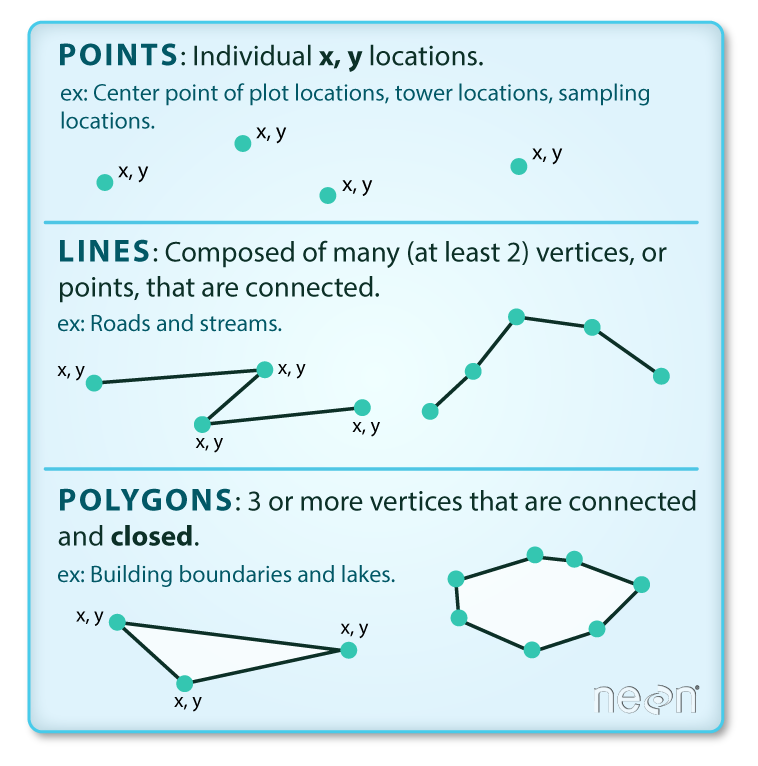

Vector data can be stored in lots of formats:
- Shapefiles: `.shp`
- GeoJSON: `.json`
- XYZ file: `.xyz`
- CSV file with lat/lon columns: `.csv`
- *etc...*

## What a rasters?

Rasters are **pixelated/gridded** data where each pixel is associated with a specific geographic location.

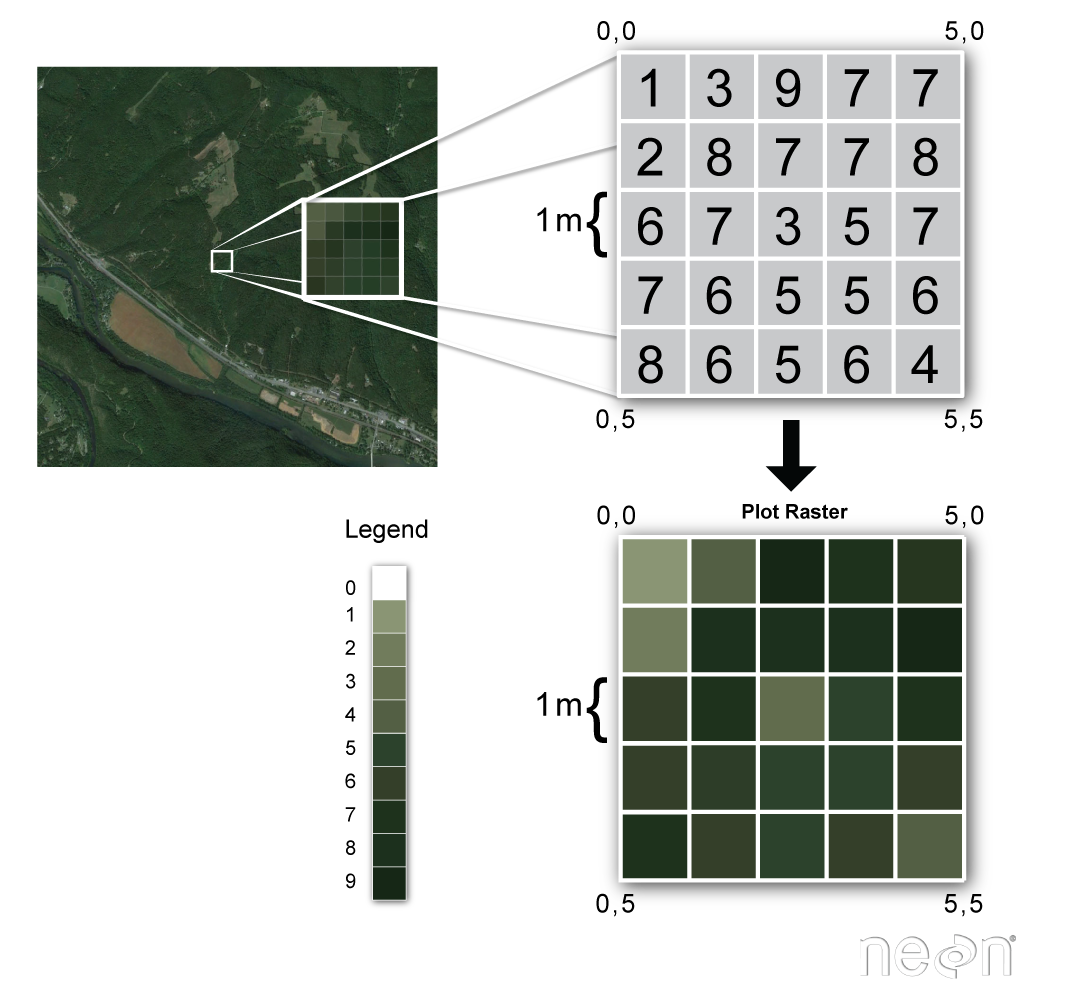

Rasters can have different resolutions, from metres to >kilometres:

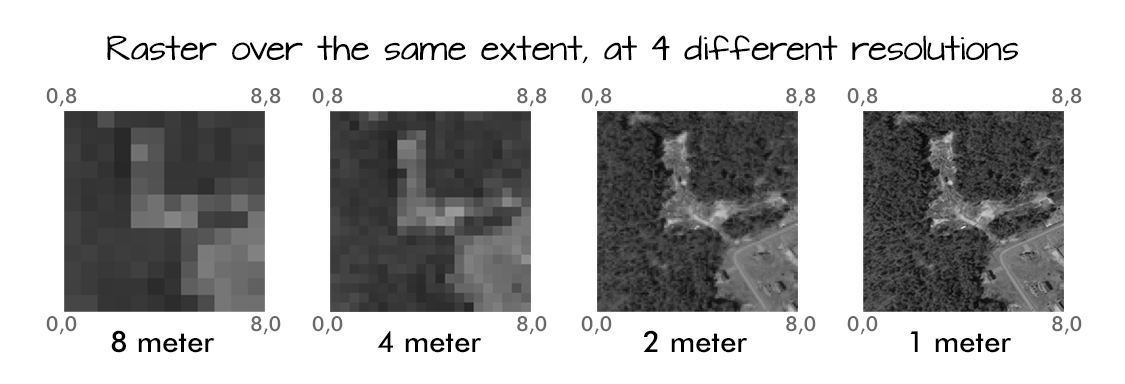

Rasters can have one or more bands. Bands could represent colours in a colour image, or other dimensions of interest (e.g. time).

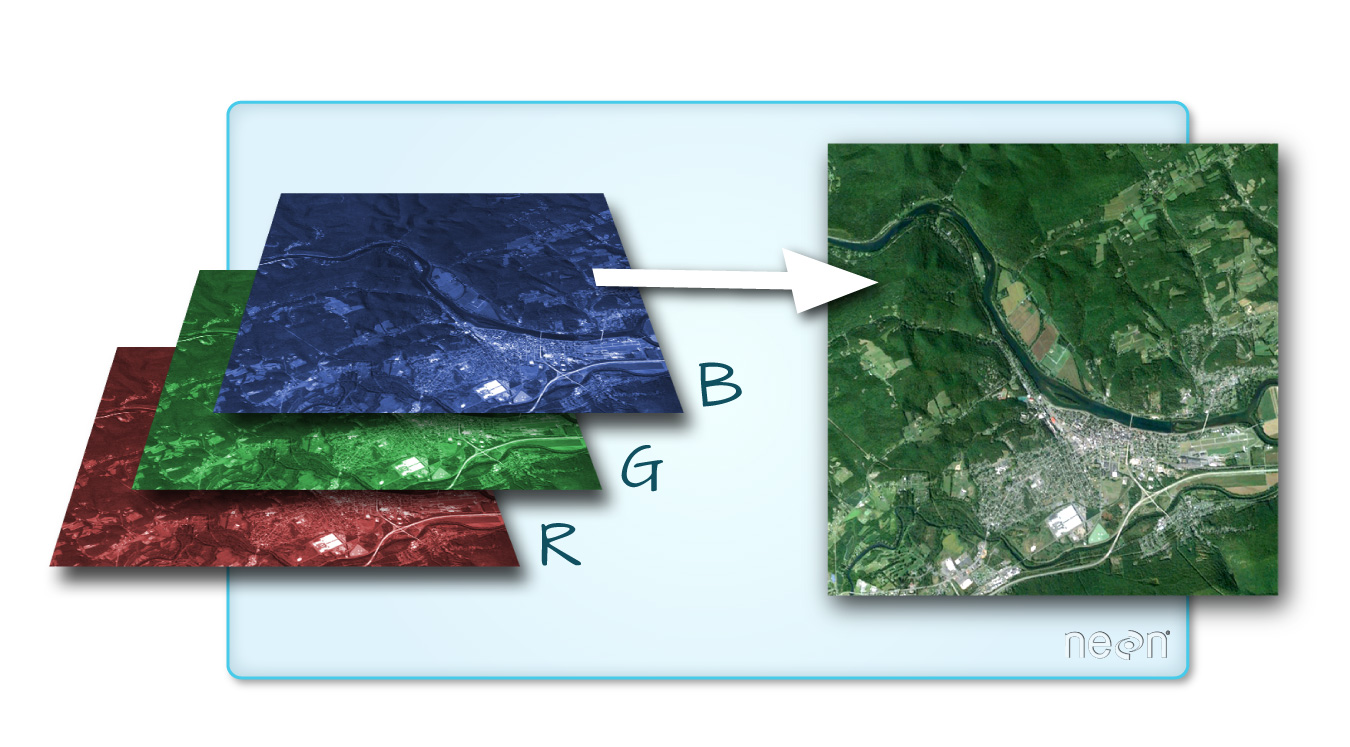

Rasters can be stored in lots of formats:
- GeoTIFF: `.tiff`
- ASCII/Esri grid: `.grd`
- NetCDF following CF Conventions: `.nc`
- JPEG2000: `.jpeg`

## What is a CRS?

### Coordinate Reference System

**Data are only geospatial if they have a CRS.** The CRS connects the data to the Earth's surface and detail how the 3D globe should be flatten onto a 2D image.

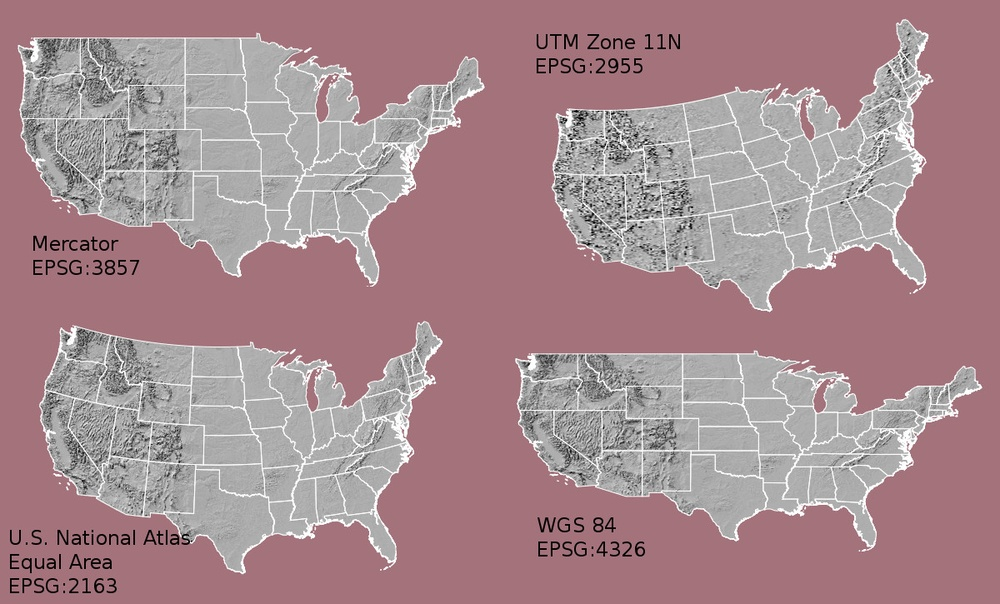

CRSs can be *geopgrahic* or *projected*.
- *Geographic* CRSs use units of latitude and longitude (and sometimes height). Popular example: WGS 84. Geographic coordinate systems are generally best for working on large (global) scales.
- *Projected* CRSs project lat/lon values to a 2D plane (eastings and northings). Popular example: EPSG:3857, a spherical projection using by e.g. Google.

CRSs can be uniquely described by:
- EPSG codes: a database of CRS information maintained by the International Association of Oil and Gas Producers.
- Well-Known Text (WKT): Open Geospatial Consortium (OGC) standard. Nested listed of parameters describing CRS. Difficult to read, but can represent more complex geopgrahic information.
- PROJ string: Simpler than WKT, but now deprecated in favour of WKT.

British National Grid, `EPSG:27700`: https://epsg.io/27700.

## Using `geopandas` to work with vectors

GeoPandas combines Pandas and Shapely to be able to manage vector data in a Pandas DataFrame.

See https://geopandas.org/. Recommended installation is via Conda: `conda install -c conda-forge geopandas`.

In [35]:
import geopandas as gpd

# This could be a path to e.g. a Shapefile, GeoJSON file etc.
# Here we're using a dataset provided with GeoPandas
file_path = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(file_path)
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [36]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plotting

<AxesSubplot:>

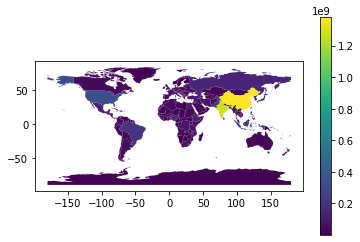

In [37]:
gdf.plot("pop_est", legend=True)

### Pandas filtering

<AxesSubplot:>

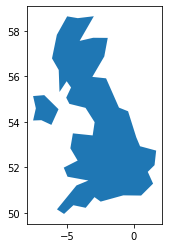

In [38]:
# Filter the dataset where column iso_a3 equals GBR and then plot
gdf[gdf['iso_a3'] == 'GBR'].plot()

### Changing the projection

<AxesSubplot:>

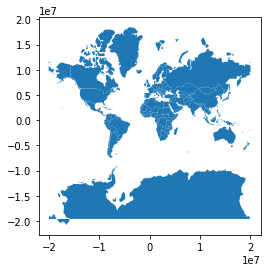

In [39]:
gdf_wm = gdf.to_crs('EPSG:3857')
gdf_wm.plot()

<AxesSubplot:>

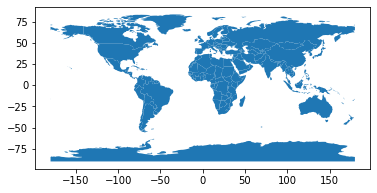

In [40]:
gdf.plot()

### Areas, centroids and distances

We can easily measure the area of polygons:

In [41]:
# Create a new column 'area' that is the area of each geometry (country)
gdf_wm['area'] = gdf_wm.area
gdf_wm.sort_values('area', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
18,142257519,Europe,Russia,RUS,3745000.00,"MULTIPOLYGON (((19895609.388 11436139.118, 200...",8.304514e+13
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",5.216648e+13
22,57713,North America,Greenland,GRL,2173.00,"POLYGON ((-5205721.290 17490757.185, -4831982....",3.628550e+13
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",2.186228e+13
139,1379302771,Asia,China,CHN,21140000.00,"MULTIPOLYGON (((12186724.586 2060702.116, 1209...",1.497731e+13
...,...,...,...,...,...,...,...
175,1218208,North America,Trinidad and Tobago,TTO,43570.00,"POLYGON ((-6866186.192 1204901.071, -6802177.4...",8.051555e+09
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((3940438.428 3696430.498, 3888101.327...",7.015327e+09
128,594130,Europe,Luxembourg,LUX,58740.00,"POLYGON ((672711.849 6468481.737, 694939.873 6...",5.785823e+09
160,265100,Asia,N. Cyprus,-99,3600.00,"POLYGON ((3643685.108 4182926.430, 3651554.656...",5.686154e+09


We can get the centre of the polygons:

<AxesSubplot:>

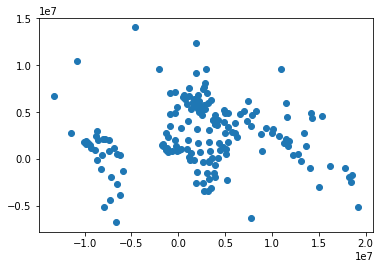

In [42]:
# Create a new column that is the centroid of each geometry (country)
gdf_wm['centroid'] = gdf_wm.centroid
gdf_wm['centroid'].plot()

We can calculate distances between these centroids. E.g. say we want to calculate the distance from the UK:

In [43]:
# Get the row that is for the UK
uk_centroid = gdf_wm[gdf_wm['name'] == 'United Kingdom']['centroid'].iloc[0]
# Create a new column and use the distance() method to calculate the distance to the UK centroid
gdf_wm['distance_to_uk'] = gdf_wm['centroid'].distance(uk_centroid)
gdf_wm.sort_values('distance_to_uk', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area,centroid,distance_to_uk
136,4510327,Oceania,New Zealand,NZL,174800.0,"MULTIPOLYGON (((19690839.812 -4875534.642, 196...",5.005072e+11,POINT (19211133.527 -5143927.928),2.310196e+07
134,279070,Oceania,New Caledonia,NCL,10770.0,"POLYGON ((18454544.055 -2401420.887, 18545826....",2.686859e+10,POINT (18427504.310 -2423487.891),2.107120e+07
89,282814,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((18614489.182 -1792201.332, 186...",8.119409e+09,POINT (18598636.273 -1752068.573),2.092808e+07
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200...",2.128334e+10,POINT (18248781.791 -1958098.338),2.070252e+07
135,647581,Oceania,Solomon Is.,SLB,1198.0,"MULTIPOLYGON (((18047007.277 -1173496.191, 180...",2.549835e+10,POINT (17807849.653 -989994.877),1.989061e+07
...,...,...,...,...,...,...,...,...,...
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((685356.051 6586647.408, 672711.849 6...",7.485603e+10,POINT (509597.156 6561035.236),1.043256e+06
130,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((768676.624 7072687.677, 789483.757 7...",1.067734e+11,POINT (614065.187 6856791.175),9.944941e+05
133,5011102,Europe,Ireland,IRL,322000.0,"POLYGON ((-689945.390 7145114.483, -671588.863...",1.626143e+11,POINT (-891472.831 7020537.812),5.929234e+05
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-689945.390 7145114.483, -7740...",7.223808e+11,POINT (-323128.917 7189485.698),0.000000e+00


Remember this is just a Pandas DataFrame, so we can do all the usual Pandas stuff with the data.

<AxesSubplot:xlabel='name'>

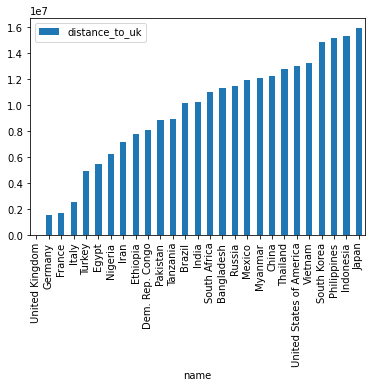

In [44]:
# Get only countries with populations of >50 million and plot on a bar chart
gdf_big = gdf_wm[gdf_wm['pop_est'] > 50000000]
gdf_big = gdf_big.sort_values('distance_to_uk')
gdf_big.plot.bar(x='name', y='distance_to_uk')

### Writing to file

In [45]:
gdf_big[['name','geometry','distance_to_uk']].to_file('./data/big_countries.geojson',
                                                      driver='GeoJSON')

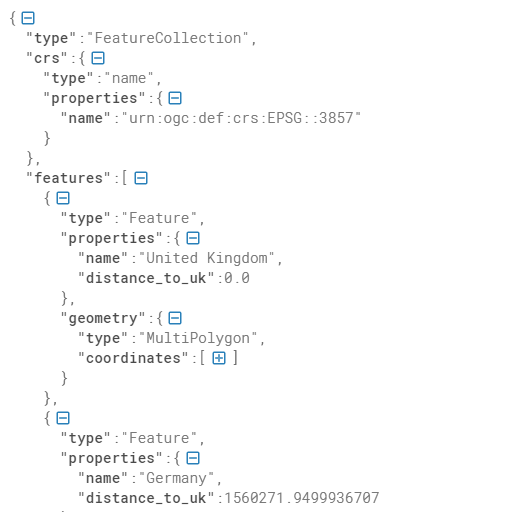

## Using `rasterio` to work with rasters

Rasterio is library that wraps around the ubiquitous GDAL library to give a user-friendly interface for dealing with raster data.

See https://rasterio.readthedocs.io/en/latest/. Recommended installation is via Conda: `conda install -c conda-forge rasterio`.

In [46]:
import rasterio as rio

rs = rio.open('./data/rainfall_5km_2017.tif')
rs.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.324964600004,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [47]:
rs.res

(5000.0, 5000.0)

In [48]:
rs.bounds

BoundingBox(left=0.0, bottom=0.0, right=700000.0, top=1250000.0)

In [49]:
rs.shape

(250, 140)

In [50]:
rs.count

366

Rasterio is really just adding some metadata to NumPy arrays:

In [51]:
arr = rs.read(300, masked=True)
arr

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.4e+38,
  dtype=float32)

In [52]:
print(rs.nodata)
arr = rs.read(300)
arr

-3.4e+38


array([[-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       ...,
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38],
       [-3.4e+38, -3.4e+38, -3.4e+38, ..., -3.4e+38, -3.4e+38, -3.4e+38]],
      dtype=float32)

### Plotting

Rasterio has a convert `rasterio.plot.show()` function, which wraps around Matplotlib:

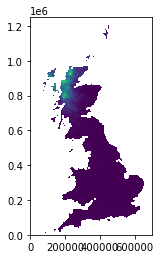

<AxesSubplot:>

In [53]:
from rasterio.plot import show, show_hist

show(rs)

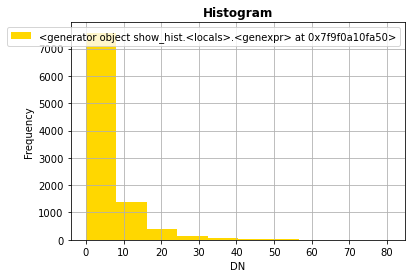

In [54]:
show_hist(rs.read(300, masked=True))

### Commond line interface

Rasterio has a fairly extensive CLI capable of performing common useful tasks:

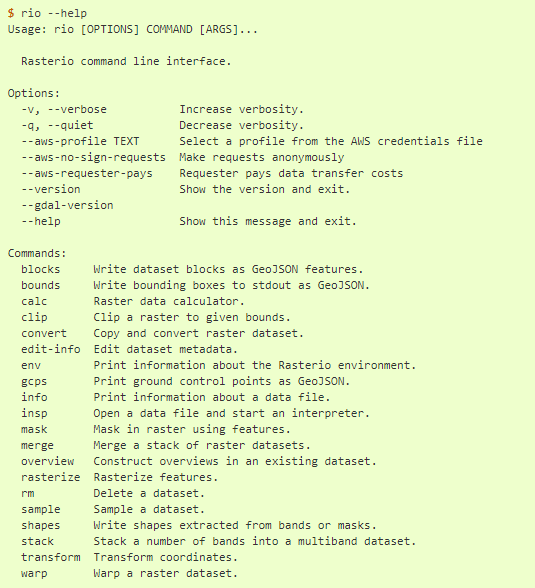

`rio insp` and `rio info` are particularly useful for having a quick look at files. For example, to quickly get metadata about a file:

```
$ rio info rainfall_5km_2015-300.tif --verbose

{"bounds": [0.0, 0.0, 700000.0, 1250000.0], "checksum": [8245], "colorinterp": ["gray"], "compress": "lzw", "count": 1, "crs": "PROJCS[\"unnamed\",GEOGCS[\"Airy 1830\",DATUM[\"unknown\",SPHEROID[\"airy\",6377563.396,299.3249753150345],TOWGS84[446.448,-125.157,542.06,0.15,0.247,0.842,-20.489]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",49],PARAMETER[\"central_meridian\",-2],PARAMETER[\"scale_factor\",0.9996012717],PARAMETER[\"false_easting\",400000],PARAMETER[\"false_northing\",-100000],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]]]", "descriptions": [null], "driver": "GTiff", "dtype": "float32", "height": 250, "indexes": [1], "interleave": "band", "lnglat": [-2.7933739244523172, 55.516181609501864], "mask_flags": [["nodata"]], "nodata": -3.4e+38, "res": [5000.0, 5000.0], "shape": [250, 140], "stats": [{"max": 20.69357681274414, "mean": 3.7167322386771935, "min": 0.0}], "tiled": false, "transform": [5000.0, 0.0, 0.0, 0.0, -5000.0, 1250000.0, 0.0, 0.0, 1.0], "units": [null], "width": 140}
```

Quickly plotting a file:

```
$ rio insp rainfall_5km_2015-300.tif
Rasterio 1.0.25 Interactive Inspector (Python 3.7.3)
Type "src.meta", "src.read(1)", or "help(src)" for more information.
>>> rasterio.plot.show(src)
```

Quickly reprojecting (changing coordinate system) and resampling (changing resolution) is very easy with `rio warp`:

Change CRS to British National Grid:
```
$ rio warp input.tif output.tif --dst-crs EPSG:27700
```

Resample to 1x1 km grid using cubic interpolation:
```
$ rio warp input.tif output.tif --res 1000 --resampling cubic
```

Based on another raster:
```
$ rio warp input.tif output.tif --like template.tif
```

## Linking `rasterio` with `xarray`

A neat little package called `rioxarray` lets you combine `rasterio`s functionality into `xarray`, as well as adding an easier-to-use interface to some function (e.g. reprojection, clipping).

`xarray`: Multidimensional labelled arrays. Introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

![xarray](http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png)

In [55]:
import xarray
import rioxarray
import pandas as pd

xds = rioxarray.open_rasterio('./data/rainfall_5km_2017.tif', masked=True)
xds

<xarray.DataArray (band: 366, y: 250, x: 140)>
[12810000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * y            (y) float64 1.248e+06 1.242e+06 1.238e+06 ... 7.5e+03 2.5e+03
  * x            (x) float64 2.5e+03 7.5e+03 1.25e+04 ... 6.925e+05 6.975e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

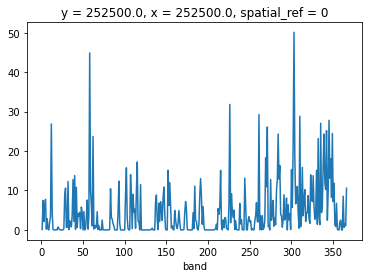

In [56]:
xds.sel(x=250000, y=250000, method='nearest').plot()

## Clipping a raster with a vector

Say we want to clip data for the Thames catchment, for which we have a Shapefile (vector):

<AxesSubplot:>

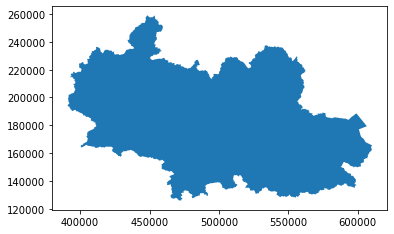

In [57]:
gdf_thames = gpd.read_file('./data/thames_catchment_osgb/thames_catchment_osgb.shp')
gdf_thames.plot()

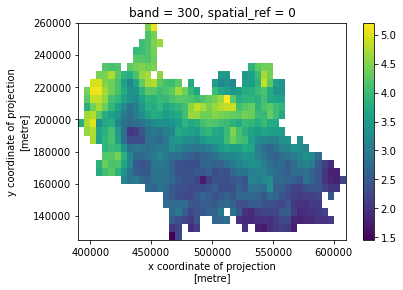

In [58]:
clipped = xds.rio.clip(gdf_thames.geometry, gdf_thames.crs)
clipped.sel(band=300).plot()
# Could also do: clipped[299,:,:].plot()

In [59]:
clipped.rio.to_raster('./data/thames.tif')

## Reprojecting and resampling a raster

Reprojecting a raster to a different CRS is simple with rioxarray. Say we want to reproject the previous raster to EPSG:3857 (used by e.g. Google Maps), and at the same time resample it from 5x5 km to 1x1 km using bilinear interpolation.

In [60]:
# Rasterio resampling methods available: nearest, bilinear, cubic,
# cubic_spline, lanczos, average, mode, max, min, med, q1, q3
from rasterio.warp import Resampling

clipped_wm = clipped.rio.reproject('EPSG:3857',
                                   resolution=(1000,1000),
                                   resampling=Resampling.bilinear)
clipped_wm.rio.crs

CRS.from_epsg(3857)

In [61]:
clipped_wm.rio.resolution()

(1000.0, -1000.0)

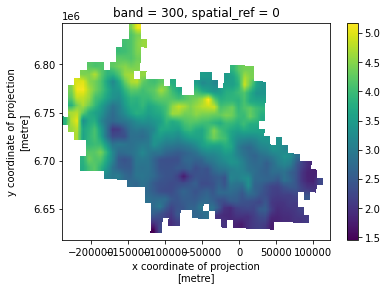

In [62]:
clipped_wm.sel(band=300).plot()

Note the x-coordinate origin is now at the Prime Meridian in Greenwich.

## Bringing it all togther: Interpolating point data

Say we have some sampling data at various points around the country, and we want turn this into a raster by interpolating between the points. We can use `geopandas`, `rasterio` and `rioxarray` to do this.

Here I'm using some soil chemistry data from the Thames catchment. Our data looks like this:

<AxesSubplot:>

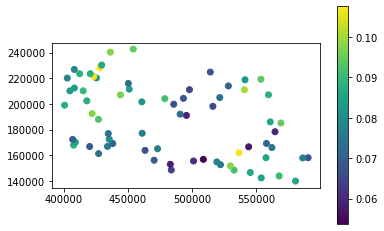

In [63]:
gdf = gpd.read_file('./data/thames_k_att_shp/thames_k_att_osgb.shp')
gdf.plot('k_att', legend=True)

### Burn the shapefile into a raster

In [64]:
from rasterio import features

# Base our raster on a template raster (the Thames catchment in this case)
rs_thames = rio.open('./data/template.tif')
meta = rs_thames.meta.copy()

# Open a new file to write the burnt raster to
with rio.open('./data/rasterized.tif', 'w+', **meta) as out:
    out_arr = out.read(1)
    # Turn the Shapefile into geom, value tuples to pass to the rasterize function
    shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf.k_att))
    # Perform the burning using rasterio's rasterize
    rasterized = features.rasterize(shapes, out=out_arr, transform=out.transform)
    # Write the burnt raster to file
    out.write(rasterized, 1)

Having a look at our burnt raster:

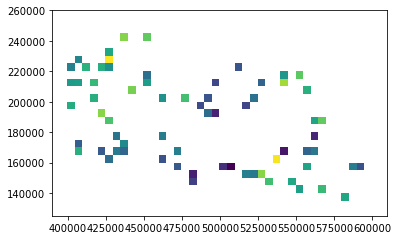

In [65]:
with rio.open('./data/rasterized.tif') as src:
    show(src)

### Using `interpolate_na` from `rioxarray`

This method uses `scipy.interpole.griddata` to interpolate missing data by nearest neighbour, linearly or cubically. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html.

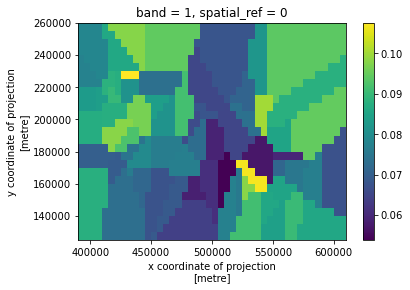

In [66]:
xds_int = rioxarray.open_rasterio('./data/rasterized.tif')
filled = xds_int.sel(band=1).rio.interpolate_na('nearest')
filled.plot()

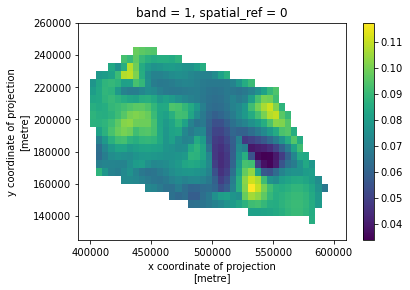

In [67]:
filled = xds_int.sel(band=1).rio.interpolate_na('cubic')
# Set nodata to NaN
filled = filled.where(filled != filled.rio.nodata)
filled.plot()

## Further info:

- Very extensive course, mainly focussed on vector data (but with a bit of raster): https://automating-gis-processes.github.io/site/index.html
- Great intro to both raster and vector processing in Python: https://carpentries-incubator.github.io/geospatial-python/aio/index.html
- GeoPandas, Rasterio and rioxarray docs

## Next talk: Any volunteers? Ideas for topics?

### 27 April 2021